In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [ ]:
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()

Saving Train_Data.txt to Train_Data.txt


Saving Test_Data.txt to Test_Data.txt


In [ ]:
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)

## Feature Selection or Manipulation


In [ ]:
X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})

print(X['x6'][20:30])

20    10
21     7
22     1
23     0
24     1
25     7
26     1
27     1
28     1
29     1
Name: x6, dtype: object


In [ ]:
y = df_train['class'].replace({2:0, 4:1})

In [ ]:
from sklearn.svm import LinearSVC 
from sklearn.feature_selection import SelectFromModel 
X, y = X,y 

lsvc = LinearSVC(C=0.003, penalty="l1", dual=False).fit(X, y) 
model = SelectFromModel(lsvc, prefit=True) 
X_new = model.transform(X) 
X_new.shape

(599, 3)

In [ ]:
x_train = torch.Tensor(np.array([X['x2'], X['x6'],X['x8']]).astype(np.uint8)).t() 
print(x_train.shape)

y_train = torch.Tensor(y).unsqueeze(1)
print(y_train.shape)

torch.Size([599, 3])
torch.Size([599, 1])


# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred  

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

print(x_train.shape)

torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1)
print(list(model.parameters()))

torch.Size([599, 3])
[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [ ]:
[w, b] = model.parameters()
print(w) 
w1, w2,w3= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(),w3.item(), b[0].item())

Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)


# training the model 

In [ ]:
criterion = nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 300
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  loss = criterion(y_pred, y_train)

  l_lambda = 0.1
  l_reg = torch.tensor(0.)
  for param in model.parameters():
      l_reg += torch.norm(param) 
  loss += l_lambda * l_reg

  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.967048168182373
epoch:  1 loss:  0.9332749247550964
epoch:  2 loss:  0.8825355768203735
epoch:  3 loss:  0.8356207609176636
epoch:  4 loss:  0.8058540225028992
epoch:  5 loss:  0.7938900589942932
epoch:  6 loss:  0.7924759387969971
epoch:  7 loss:  0.7935124635696411
epoch:  8 loss:  0.7913891077041626
epoch:  9 loss:  0.7832435369491577
epoch:  10 loss:  0.7682748436927795
epoch:  11 loss:  0.7470915913581848
epoch:  12 loss:  0.7212886810302734
epoch:  13 loss:  0.693178653717041
epoch:  14 loss:  0.6655459403991699
epoch:  15 loss:  0.6469318270683289
epoch:  16 loss:  0.6354278326034546
epoch:  17 loss:  0.6302128434181213
epoch:  18 loss:  0.6293783783912659
epoch:  19 loss:  0.629397451877594
epoch:  20 loss:  0.6269255876541138
epoch:  21 loss:  0.6205782294273376
epoch:  22 loss:  0.611376941204071
epoch:  23 loss:  0.6017131209373474
epoch:  24 loss:  0.5937731266021729
epoch:  25 loss:  0.5885441303253174
epoch:  26 loss:  0.5857882499694824
epoch:  27 loss

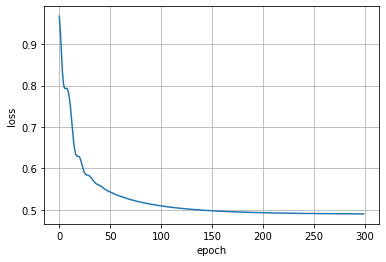

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

# model evalation with new datasets the model has never seen before

In [ ]:
X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
Y_test = df_test['class'].replace({2:0, 4:1})

x_test = torch.Tensor(np.array([X_test['x2'], X_test['x6'],X_test['x8']]).astype(np.uint8)).t() 
print(x_test.shape)
y_test = torch.Tensor(Y_test).unsqueeze(1)
print(y_test.shape)

torch.Size([100, 3])
torch.Size([100, 1])


In [ ]:
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 95.32554257095158%
Predcition accuracy_test= 100.0%
